# FuzConvTrue

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Libraries

In [39]:

import numpy as np
import random
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from keras.layers import Activation
import tensorflow as tf
import cv2
from tensorflow.keras.layers import Lambda, Layer, ReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Concatenate, BatchNormalization, SpatialDropout2D, SeparableConv2D, Add, Lambda, AveragePooling2D, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.core import Reshape
from keras import optimizers
from tensorflow.keras import regularizers
from keras import Input, Model
from time import time
import time as tm
from keras.initializers import Constant, RandomNormal, glorot_normal
from tensorflow.keras.models import load_model
from tensorflow.keras.activations import tanh
from tensorflow.keras.regularizers import l2
from keras import backend as K
from tensorflow.keras.utils import plot_model

## 30 SRM filters for preprocessing and the activation function

In [40]:
################################################## 30 SRM FILTERS
srm_weights = np.load('drive/MyDrive/SIMPA_EGYPTIAN/4_Work_Jean_SIMPA/Python_codes/SRM_Filters/SRM.npy') 
biasSRM = np.ones(30)
#print (srm_weights.shape)
################################################## TANH ACTIVATION FUNCTION
T3 = 3;
def Tanh3(x):
    tanh3 = K.tanh(x)*T3
    return tanh3
##################################################

## Architecture

In [41]:
def FuzConvTrue(img_size=256):
    inputs = Input(shape=(img_size, img_size, 1), name="input_1")

    # Layer 1
    layers = Conv2D(30, (5, 5), strides=(1, 1), padding="same", activation=tanh)(inputs)
    lay = BatchNormalization()(layers)

    # Layer 2
    lay = SpatialDropout2D(rate=0.1)(lay)
    njoc = SeparableConv2D(30, (3, 3), activation="relu", depth_multiplier=3, padding="same")(lay)
    njoc = Lambda(abs)(njoc)
    njoc = BatchNormalization()(njoc)
    njoc = SeparableConv2D(30, (3, 3), activation="relu", depth_multiplier=3, padding="same")(njoc)
    njoc = Lambda(abs)(njoc)
    njoc = BatchNormalization()(njoc)
    layers = Add()([njoc, lay])

    # Layer 3
    lay = SpatialDropout2D(rate=0.1)(lay)
    njoc = SeparableConv2D(30, (3, 3), activation="relu", depth_multiplier=3, padding="same")(lay)
    njoc = Lambda(abs)(njoc)
    njoc = BatchNormalization()(njoc)
    njoc = SeparableConv2D(30, (3, 3), activation="relu", depth_multiplier=3, padding="same")(njoc)
    njoc = Lambda(abs)(njoc)
    njoc = BatchNormalization()(njoc)
    layers = Add()([njoc, lay])

    # Layer 4
    layers = Conv2D(32, (3, 3), strides=(1, 1), activation="relu", kernel_initializer='glorot_normal', padding='same')(layers)
    layers = Lambda(abs)(layers)
    layers = BatchNormalization()(layers)
    layers = AveragePooling2D((5, 5), strides=(2, 2), padding="same")(layers)
    layers = Conv2D(32, (3, 3), strides=(1, 1), activation="relu", kernel_initializer='glorot_normal', padding="same")(layers)
    layers = Lambda(abs)(layers)
    layers = BatchNormalization()(layers)
    layers = AveragePooling2D((5, 5), strides=(2, 2), padding="same")(layers)

    # Layer 5
    layers = Conv2D(64, (3, 3), strides=(1, 1), activation="relu", kernel_initializer='glorot_normal', padding="same")(layers)
    layers = Lambda(abs)(layers)
    layers = BatchNormalization()(layers)
    layers = AveragePooling2D((5, 5), strides=(2, 2), padding="same")(layers)
    layers = Conv2D(128, (5, 5), strides=(1, 1), activation="relu", kernel_initializer='glorot_normal', padding="same")(layers)
    layers = Lambda(abs)(layers)
    layers = BatchNormalization()(layers)

    # Layer 6
    layers = GlobalAveragePooling2D(data_format="channels_last")(layers)

    # Layer 7, FC, Softmax
    layers = Dense(128, activation="relu")(layers)
    layers = Dropout(0.2)(layers)
    layers = Dense(64, activation="relu")(layers)
    layers = Dropout(0.2)(layers)
    layers = Dense(32, activation="relu")(layers)

    # Softmax
    predictions = Dense(2, activation="softmax", name="output_1")(layers)

    # Model generation
    model = Model(inputs=inputs, outputs=predictions)

    # Optimizer
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

    # Compilator
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    print("FuzConvTrue model generated")
    return model




Saving the model architecture

In [17]:
!pip install tensorflow matplotlib python-docx

from docx import Document

def FuzConvTrue_model_summary(model, filename):
    # Output directory
    output_dir = '/content/drive/My Drive/SIMPA_EGYPTIAN/4_Work_Jean_SIMPA/Python_codes/Architecture_Model/'
    
    # model summary as image
    image_path = os.path.join(output_dir, 'FuzConvTrue_model_summary.png')
    plot_model(model, to_file=image_path, show_shapes=True)

    #  model summary as MS-Word table
    doc = Document()
    table = doc.add_table(rows=1, cols=3)
    table.style = 'Table Grid'
    table.autofit = False

    # headers of the table
    headers = ['Layer (type)', 'Input Shape','Output Shape']
    for i, header in enumerate(headers):
        cell = table.cell(0, i)
        cell.text = header

    # layer information to the table
    for layer in model.layers:
        row = table.add_row().cells
        row[0].text = layer.name
        row[1].text = str(layer.input_shape)
        row[2].text = str(layer.output_shape)

    # Save the Word document
    doc_path = os.path.join(output_dir, filename)
    doc.save(doc_path)

model = FuzConvTrue()
FuzConvTrue_model_summary(model, 'FuzConvTrue_model_summary.docx')



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 104.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184491 sha256=cc7103631b826389966f13029b4d880e7320494e10e7255ebbca8826d192a2f5
  Stored in directory: /root/.cache/pip/wheels/80/27/06/837436d4c3bd989b957a91679966f207bfd71d358d63a8194d
Successfully built python-docx
FuzConvTrue model generated


## Defining different functions to work with the architecture

In [42]:

def train(model, X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size, epochs, initial_epoch=0, model_name=""):
    start_time = time()
    log_dir = "/content/drive/My Drive/SIMPA_EGYPTIAN/4_Work_Jean_SIMPA/Python_codes/Trained_Models/" + model_name + "_" + "{}".format(time())
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir)
    filepath = log_dir + "/saved-model-{epoch:02d}-{val_accuracy:.2f}.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=False, mode='max')
    model.reset_states()
    history = model.fit(X_train, y_train, epochs=epochs, 
                        callbacks=[tensorboard,checkpoint], 
                        batch_size=batch_size, validation_data=(X_valid, y_valid), initial_epoch=initial_epoch)

    metrics = model.evaluate(X_test, y_test, verbose=0)
    results_dir = "/content/drive/My Drive/SIMPA_EGYPTIAN/4_Work_Jean_SIMPA/Python_codes/Results/" + model_name + "/"
    if not os.path.exists(results_dir):
        os.makedirs(results_dir)
      
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(5, 5))
        #plt.subplot(1,2,1)
        #Plot training & validation accuracy values
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Accuracy Vs Epochs')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.grid('on')
        plt.savefig(results_dir+'Accuracy_FuzConvTrue_'+model_name+'.eps', format='eps')
        plt.savefig(results_dir+'Accuracy_FuzConvTrue_'+model_name+'.svg', format='svg')
        plt.savefig(results_dir+'Accuracy_FuzConvTrue_'+model_name+'.pdf', format='pdf')
        plt.show()
        
        plt.figure(figsize=(5, 5))
        #plt.subplot(1,2,2)
        #Plot training & validation loss values
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Loss Vs Epochs')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.grid('on')
        plt.savefig(results_dir+'Loss_FuzConvTrue_'+model_name+'.eps', format='eps')
        plt.savefig(results_dir+'Loss_FuzConvTrue_'+model_name+'.svg', format='svg')
        plt.savefig(results_dir+'Loss_FuzConvTrue_'+model_name+'.pdf', format='pdf')
        plt.show()

        '''
        plt.figure(figsize=(5, 5))
        #plt.subplot(1,2,2)
        #Plot training & validation loss values
        plt.plot(history.history['lr'])
        plt.ylabel('Lr')
        plt.xlabel('Epoch')
        plt.grid('on')
        plt.show()
        '''
    TIME = tm.time() - start_time
    print("Time "+model_name+" = %s [seconds]" % TIME)
    return {k:v for k,v in zip (model.metrics_names, metrics)}

In [43]:
def Final_Results_Test(model,PATH_trained_models):
    B_accuracy = 0 #B --> Best
    for filename in os.listdir(PATH_trained_models):
        if filename != ('train') and filename != ('validation'):
            print(filename)
            model.load_weights(PATH_trained_models+'/'+filename)
            loss,accuracy = model.evaluate(X_test, y_test,verbose=0)
            print(f'Loss={loss:.4f} y Accuracy={accuracy:0.4f}'+'\n') 
            if accuracy > B_accuracy:
                B_accuracy = accuracy
                B_loss = loss
                B_name = filename
    print("\n\nBest")
    print(B_name)
    print(f'Loss={B_loss:.4f} y Accuracy={B_accuracy:0.4f}'+'\n')

In [44]:
from tqdm import tqdm

def plot_train_valid(model,PATH_trained_models,model_name):
    acc_train=[]
    acc_valid=[]
    loss_train=[]
    loss_valid=[]
    for filename in tqdm(os.listdir(PATH_trained_models)):
        if filename != ('train') and filename != ('validation'):
            print(filename)
            model.load_weights(PATH_trained_models+'/'+filename)
            loss,accuracy = model.evaluate(X_train, y_train,verbose=0)
            acc_train.append(accuracy)
            loss_train.append(loss)
            loss,accuracy = model.evaluate(X_valid, y_valid,verbose=0)
            acc_valid.append(accuracy)
            loss_valid.append(loss)

    results_dir="/content/drive/My Drive/SIMPA_EGYPTIAN/4_Work_Jean_SIMPA/Python_codes/Results/"+model_name+"/"
    if not os.path.exists(results_dir):
        os.makedirs(results_dir)

    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(5, 5))
        #plt.subplot(1,2,1)
        #Plot training & validation accuracy values
        plt.plot(acc_train)
        plt.plot(acc_valid)
        plt.title('Accuracy Vs Epochs')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.grid('on')
        plt.savefig(results_dir+'FuzConvTrue_'+model_name+'.eps', format='eps')
        plt.savefig(results_dir+'FuzConvTrue_'+model_name+'.svg', format='svg')
        plt.savefig(results_dir+'FuzConvTrue_'+model_name+'.pdf', format='pdf')
        plt.show()

        plt.figure(figsize=(5, 5))
        #plt.subplot(1,2,2)
        #Plot training & validation loss values
        plt.plot(loss_train)
        plt.plot(loss_valid)
        plt.title('Loss Vs Epochs')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.grid('on')
        plt.savefig(results_dir+'FuzConvTrue_'+model_name+'.eps', format='eps')
        plt.savefig(results_dir+'FuzConvTrue_'+model_name+'.svg', format='svg')
        plt.savefig(results_dir+'FuzConvTrue_'+model_name+'.pdf', format='pdf')
        plt.show()

        '''
        plt.figure(figsize=(5, 5))
        #plt.subplot(1,2,2)
        #Plot training & validation loss values
        plt.plot(history.history['lr'])
        plt.ylabel('Lr')
        plt.xlabel('Epoch')
        plt.grid('on')
        plt.show()
        '''
    results={'acc_train':acc_train,'acc_valid':acc_valid,'loss_train':loss_train,'loss_valid':loss_valid}
    return results

## Plot ROC curves

In [45]:
from sklearn.metrics import (
    average_precision_score,
    precision_recall_curve,
    roc_auc_score,
    roc_curve,
)

def get_curve(gt, pred, target_names,model_name):
    labels=[]
    for i in range(len(target_names)):
        
        curve_function = roc_curve
        auc_roc = roc_auc_score(gt[:, i], pred[:, i])
        label = model_name+target_names[i] + " AUC: %.3f " % auc_roc
        labels.append(label)
        xlabel = "False positive rate"
        ylabel = "True positive rate"
        a, b, _ = curve_function(gt[:, i], pred[:, i])
        plt.figure(1, figsize=(7, 7))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(a, b, label=label)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)

        plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1),
                  fancybox=True, ncol=1)
      
    return [a,b],labels
labels = ["innocent","altered"]

## Working with BOSSbase 1.01 WOW PAYLOAD = 0.1bpp

In [46]:
PATH_1 = '/content/drive/My Drive/SIMPA_EGYPTIAN/4_Work_Jean_SIMPA/Python_codes/Numpy_files/'
#Dataset
EPOCHS=10

#Train
X_train = np.load(PATH_1+'X_training.npy')
y_train = np.load(PATH_1+'y_training.npy')
#Valid
X_valid = np.load(PATH_1+'X_validating.npy')
y_valid = np.load(PATH_1+'y_validating.npy')
#Test
X_test = np.load(PATH_1+'X_testing.npy')
y_test = np.load(PATH_1+'y_testing.npy')

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)


(50, 256, 256)
(50, 2)
(30, 256, 256)
(30, 2)
(20, 256, 256)
(20, 2)


## CNN name and algorithm 

In [47]:
base_name="FuzConvTrue"
m_name="FuzConvTrue"

## Training

FuzConvTrue model generated
Epoch 1/10
2/2 [==============================] - 8s 871ms/step - loss: 0.6781 - accuracy: 0.5200 - val_loss: 0.7043 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 1s 559ms/step - loss: 0.6251 - accuracy: 0.6800 - val_loss: 0.7294 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 1s 539ms/step - loss: 0.6645 - accuracy: 0.6400 - val_loss: 0.8063 - val_accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - 1s 548ms/step - loss: 0.5585 - accuracy: 0.7600 - val_loss: 0.8100 - val_accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 1s 600ms/step - loss: 0.5269 - accuracy: 0.7200 - val_loss: 1.0005 - val_accuracy: 0.5000
Epoch 6/10
2/2 [==============================] - 1s 598ms/step - loss: 0.4633 - accuracy: 0.8200 - val_loss: 0.8206 - val_accuracy: 0.5000
Epoch 7/10
2/2 [==============================] - 1s 595ms/step - loss: 0.4770 - accuracy: 0.8000 - val_loss: 0.8446 - val_accuracy:

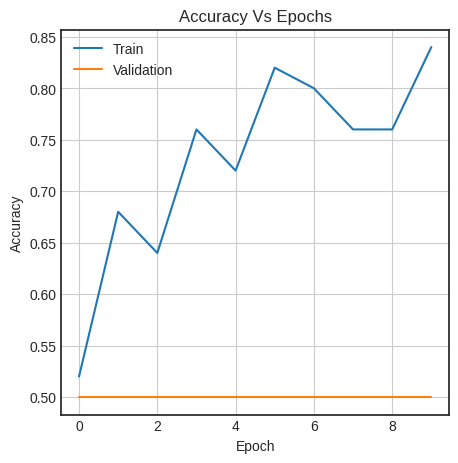

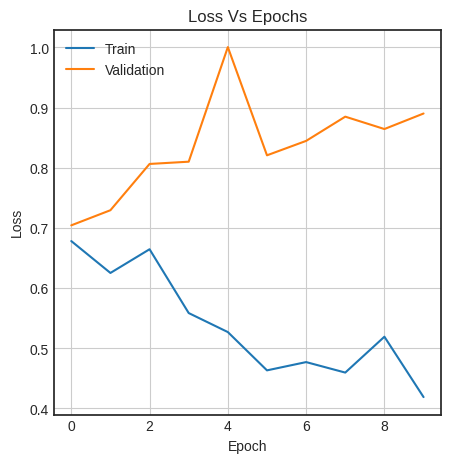

Time Model_FuzConvTrue_FuzConvTrue = 23.872742176055908 [seconds]


In [48]:
model= FuzConvTrue() 
name="Model_"+m_name+"_"+base_name
_, history  = train(model, X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size=32, epochs=10, model_name=name)

## Test

In [64]:
model= FuzConvTrue() 
PATH_trained_models = 'content/drive/My Drive/SIMPA_EGYPTIAN/4_Work_Jean_SIMPA/Python_codes/Trained_Models'
Final_Results_Test(FuzConvTrue(),'/content/drive/My Drive/SIMPA_EGYPTIAN/4_Work_Jean_SIMPA/Python_codes/Trained_Models/')

FuzConvTrue model generated
FuzConvTrue model generated
Best_trained_model.hdf5
Loss=0.8057 y Accuracy=0.5000



Best
Best_trained_model.hdf5
Loss=0.8057 y Accuracy=0.5000



## ROC curves

FuzConvTrue model generated


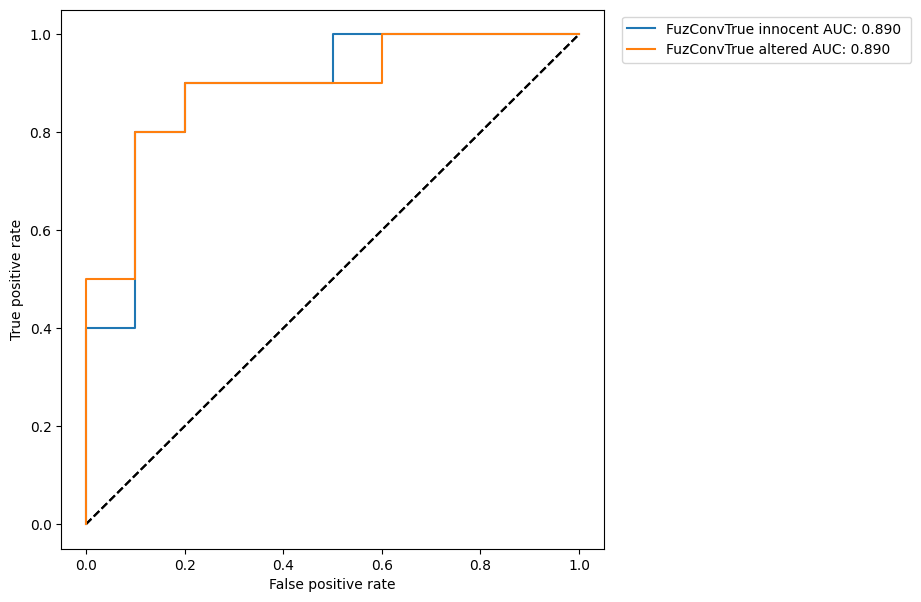

In [66]:
model= FuzConvTrue() 
model.load_weights('/content/drive/My Drive/SIMPA_EGYPTIAN/4_Work_Jean_SIMPA/Python_codes/Trained_Models/Best_trained_model.hdf5') #path best model
predictions= model.predict(X_test,verbose=0)
labels = ["innocent","altered"] 
model_name="FuzConvTrue "
curve1,labels1=get_curve(y_test, predictions, labels,model_name)

# END